<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0502/17_%EC%B5%9C%EC%A0%81%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%AA%A8%EB%8D%B8_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 이미지 데이터 불러옴 / 과대적합 시각화 위함
from tensorflow import keras # 인공신경망
from sklearn.model_selection import train_test_split # 훈련/시험 데이터

In [2]:
# tensorflow에 제공하는 옷 데이터 다운로드
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [3]:
train_input.shape
# 가로 60000개, 세로 28개 : 데이터가 60000개 있다는 뜻

(60000, 28, 28)

In [4]:
test_input.shape # 가로 10000개, 세로 28개 : 데이터가 10000개 있다는 뜻

(10000, 28, 28)

In [5]:
# 데이터 분할
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size= 0.1)
# test_size = 분할할 데이터 %, 0.1 : train 90/ vla 10으로 나눈다는 말

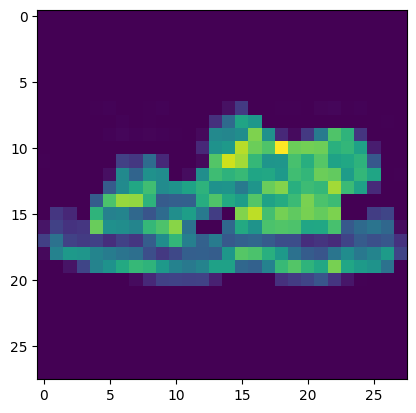

In [14]:
import matplotlib.pyplot as plt

plt.imshow(train_input[3]) # imshow :이미지 확인
# 0 : 긴팔, 1: 신발, 2: 바지, 3: 신발 ... 단, 데이터 분할 할 때 마다 데이터 다를 수 있음

In [8]:
train_target[3]
# 0: 티셔츠, 9: 신발 등 옷의 종류가 들어있음

5

In [22]:
# 훈련데이터는 3차원인데 값을 넣어주려면 2차원이어야 함

# 픽셀값 0~255 / 0에 가까울수록 검은색, 255에 가까울 수록 흰색
# 픽셀이 0보다 255가 크다고 중요하다고 하기 어려움
# 0/255 = 0 255/255=1 이라 0,1 사이의 값으로 나타낼 수 있음
# standard 써도 되지만 255로 나누는 방법도 많이 씀
train_scaled = train_input.reshape(-1,784 )/255
val_scaled = val_input.reshape(-1,784 )/255
test_scaled = test_input.reshape(-1,784 )/255
# reshape(-1,) : 자동화열
# 784 = 28*28

In [23]:
train_scaled.shape # train_scaled의 모양 확인 >> 2차원 됨

(54000, 784)

In [24]:
val_scaled.shape

(6000, 784)

In [25]:
model= keras.Sequential()
model.add(keras.layers.Dense(256, activation = 'relu', input_shape =(784,))) 
#은닉층, shape = 28*28의 개수로 784 넣어줌
model.add(keras.layers.Dense(128, activation = 'relu')) 
# 은닉층, 앞의 개수는 마음대로 정할 수 있음
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

hist = model.fit(train_scaled, train_target, epochs = 30, validation_data=(val_scaled, val_target))
# validation_data : 검증 데이터

# loss : 훈련데이터를 30번씩 하니 오차가 큼, vla_loss를 보는 것이 더 좋음

Epoch 1/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.5005 - accuracy: 0.8200 - val_loss: 0.4277 - val_accuracy: 0.8482
Epoch 2/30
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3818 - accuracy: 0.8632 - val_loss: 0.3984 - val_accuracy: 0.8595
Epoch 3/30
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3575 - accuracy: 0.8725 - val_loss: 0.3932 - val_accuracy: 0.8722
Epoch 4/30
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3425 - accuracy: 0.8796 - val_loss: 0.3997 - val_accuracy: 0.8733
Epoch 5/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3377 - accuracy: 0.8827 - val_loss: 0.4242 - val_accuracy: 0.8607
Epoch 6/30
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3294 - accuracy: 0.8856 - val_loss: 0.3984 - val_accuracy: 0.8658
Epoch 7/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3232 - accuracy: 0.8889 - val_loss: 0.4299 - val_acc

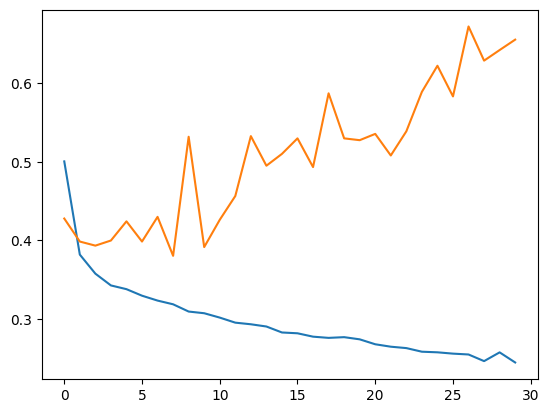

In [28]:
# 그림으로 그려보자
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

# 학습하면 할수록 오차 증가 > 과대적합

In [ ]:
model= keras.Sequential()
model.add(keras.layers.Dense(256, activation = 'relu', input_shape =(784,))) 
model.add(keras.layers.Dropout(0,3)) # 이 은닉층의 30%는 랜덤으로 끄겠다
model.add(keras.layers.Dense(128, activation = 'relu')) 
model.add(keras.layers.Dropout(0,3))
model.add(keras.layers.Dense(10, activation = 'softmax'))

# 5번 연속 나빠지면 학습 강제종료, 마지막 5번은 삭제한다
es = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights=True)
# patience 값을 많이 넣어주면 더 좋은 결과 나옴
cp = keras.callbacks.ModelCheckpoint('best.h5')
# 체크 포인트 ↑

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer = 'adam')
# optimizer = 'adam' : 학습률 조정
# 학습이 안되면 줄이고 학습이 잘되면 키운다

hist = model.fit(train_scaled, train_target, epochs = 30, validation_data=(val_scaled, val_target), callbacks = [es,cp])
# callbacks = [es,cp]) 추가
# 오차가 늘어나자 학습 중단한 것을 볼 수 있음, 마지막 5개는 삭제됨

Epoch 1/30


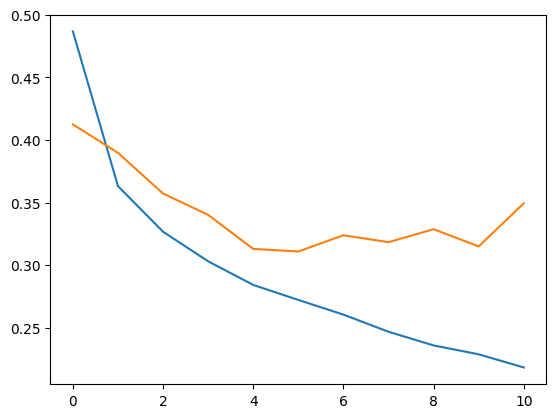

In [30]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

# 오차가 낮아지는 것을 볼 수 있음
# EarlyStopping, dropout 을 넣어주면 웬만해서는 과대적합이 일어나지 않는다